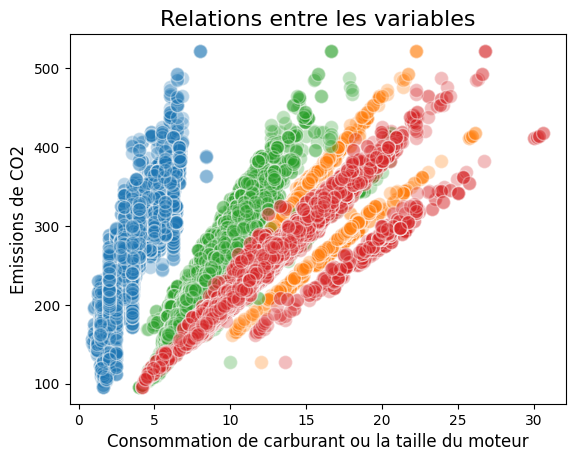

In [17]:
#Importation et traitement des données

import pandas as pd
df = pd.read_csv('co2.csv')
df.head(10)
df.describe() #Statistiques descriptives

#Supprimer les colonnes inutiles

df.drop(['Make','Model','Vehicle Class','Transmission','Fuel Type'], axis = 1, inplace = True)

#Visualisation des relations entre les variables

import matplotlib.pyplot as plt
plt.scatter(x = 'Engine Size(L)', y = 'CO2 Emissions(g/km)', data = df, s = 100, alpha = 0.3, edgecolor = 'white')
plt.title('Relations entre les variables', fontsize = 16)
plt.ylabel('Emissions de CO2', fontsize = 12)
plt.xlabel('Consommation de carburant ou la taille du moteur', fontsize = 12)
plt.savefig('enginesize_co2.png')

plt.scatter(x = 'Fuel Consumption Comb (L/100 km)', y = 'CO2 Emissions(g/km)', data = df, s = 100, alpha = 0.3, edgecolor = 'white')
plt.title('Relations entre les variables', fontsize = 16)
plt.ylabel('Emissions de CO2', fontsize = 12)
plt.xlabel('Consommation de carburant ou la taille du moteur', fontsize = 12)
plt.savefig('fcc_co2.png')

plt.scatter(x = 'Fuel Consumption Hwy (L/100 km)', y = 'CO2 Emissions(g/km)', data = df, s = 100, alpha = 0.3, edgecolor = 'white')
plt.title('Relations entre les variables', fontsize = 16)
plt.ylabel('Emissions de CO2', fontsize = 12)
plt.xlabel('Consommation de carburant ou la taille du moteur', fontsize = 12)
plt.savefig('fch_co2.png')

plt.scatter(x = 'Fuel Consumption City (L/100 km)', y = 'CO2 Emissions(g/km)', data = df, s = 100, alpha = 0.3, edgecolor = 'white')
plt.title('Relations entre les variables', fontsize = 16)
plt.ylabel('Emissions de CO2', fontsize = 12)
plt.xlabel('Consommation de carburant ou la taille du moteur', fontsize = 12)
plt.savefig('fccity_co2.png')

                                 OLS Regression Results                                 
Dep. Variable:     CO2 Emissions(g/km)   R-squared (uncentered):                   0.943
Model:                             OLS   Adj. R-squared (uncentered):              0.943
Method:                  Least Squares   F-statistic:                          1.232e+05
Date:                 Mon, 17 Mar 2025   Prob (F-statistic):                        0.00
Time:                         15:15:37   Log-Likelihood:                         -40860.
No. Observations:                 7385   AIC:                                  8.172e+04
Df Residuals:                     7384   BIC:                                  8.173e+04
Df Model:                            1                                                  
Covariance Type:             nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
---------------------------

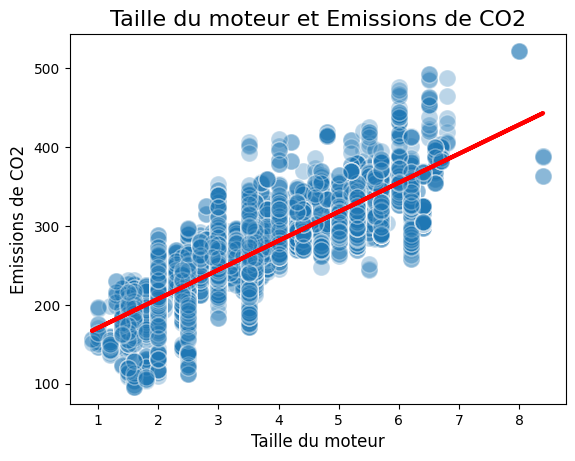

In [14]:
#Construction un modèle d'une régression linéaire simple

import pandas as pd
df = pd.read_csv('co2.csv')
X_var = df[['Engine Size(L)']] #Variable indépendant 
y_var = df['CO2 Emissions(g/km)'] #Variable dépendant

#Première méthode avec Statsmodels

import statsmodels.api as sm
from termcolor import colored as cl
slr_model = sm.OLS(y_var, X_var) #Méthode des moindres carrés ordinaire 
slr_reg = slr_model.fit()
print(cl(slr_reg.summary(),attrs = ['bold'])) #Présision du modèle

#Deuxième méthode avec Scikit-learn

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_var, y_var, test_size = 0.3, random_state = 0)
lr = LinearRegression()
lr.fit(X_train, y_train)
yhat = lr.predict(X_test)
slr_slope = lr.coef_
slr_intercept = lr.intercept_

#Affichage des résultats

import matplotlib.pyplot as plt
import seaborn as sb
sb.scatterplot(x = 'Engine Size(L)', y = 'CO2 Emissions(g/km)', data = df, s = 150, alpha = 0.3, edgecolor = 'white')
plt.plot(df['Engine Size(L)'], slr_slope*df['Engine Size(L)'] + slr_intercept, color = 'r', linewidth = 3)
plt.title('Taille du moteur et Emissions de CO2', fontsize = 16)
plt.ylabel('Emissions de CO2', fontsize = 12)
plt.xlabel('Taille du moteur', fontsize = 12)
plt.savefig('enginesize_co2_fit.png')
print(cl('R-Squared :', attrs = ['bold']), lr.score(X_test, y_test))

In [ ]:
#Construction un modèle d'une régression linéaire multiple

df = pd.read_csv('co2.csv')
X1_var = df[['Engine Size(L)','Fuel Consumption Comb (L/100 km)','Fuel Consumption Hwy (L/100 km)','Fuel Consumption City (L/100 km)']]
y_var = df['CO2 Emissions(g/km)'] #Variable dépendant

#Première méthode avec Statsmodels

import statsmodels.api as sm
sm_X1_var = sm.add_constant(X1_var)
mlr_model = sm.OLS(y_var, sm_X1_var) #Méthode des moindres carrés ordinaire
mlr_reg = mlr_model.fit()
print(cl(mlr_reg.summary(), attrs = ['bold'])) #Présision du modèle

#Deuxième méthode avec Scikit-learn

X_train, X_test, y_train, y_test = train_test_split(X1_var, y_var, test_size = 0.3, random_state = 0)
lr = LinearRegression()
lr.fit(X_train, y_train)
yhat = lr.predict(X_test)
print(cl('R-Squared :', attrs = ['bold']), lr.score(X_test, y_test))

                             OLS Regression Results                            
Dep. Variable:     CO2 Emissions(g/km)   R-squared:                       0.874
Model:                             OLS   Adj. R-squared:                  0.874
Method:                  Least Squares   F-statistic:                 1.276e+04
Date:                 Mon, 17 Mar 2025   Prob (F-statistic):               0.00
Time:                         14:55:38   Log-Likelihood:                -32890.
No. Observations:                 7385   AIC:                         6.579e+04
Df Residuals:                     7380   BIC:                         6.582e+04
Df Model:                            4                                         
Covariance Type:             nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

C:\Users\Hatim\AppData\Local\Temp\ipykernel_8712\2961629225.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(yhat, hist = False, color = 'r', label = 'Valeurs Estimées')
C:\Users\Hatim\AppData\Local\Temp\ipykernel_8712\2961629225.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.dist

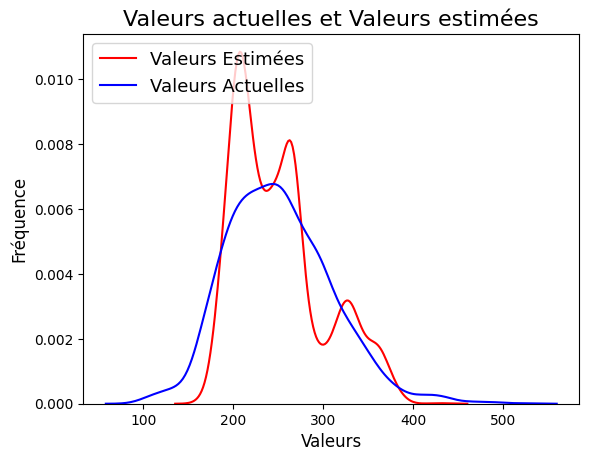

In [15]:
#Précision du modèle linéaire multiple par comparaison 

import seaborn as sb
import matplotlib.pyplot as plt
sb.distplot(yhat, hist = False, color = 'r', label = 'Valeurs Estimées')
sb.distplot(y_test, hist = False, color = 'b', label = 'Valeurs Actuelles')
plt.title('Valeurs actuelles et Valeurs estimées', fontsize = 16)
plt.xlabel('Valeurs', fontsize = 12)
plt.ylabel('Fréquence', fontsize = 12)
plt.legend(loc = 'upper left', fontsize = 13)
plt.savefig('ap.png')